# Predicting categories with Logistic Regression

**Aim**: The aim of this notebook is to predict if a mobile transaction is fraudulent or not by using the logistic regression algorithm with scikit-learn.

## Table of contents

2. Implementing the logistic regression algorithm
3. Fine-tuning parameters using GridsearchCV
4. Scaling
5. Interpreting the results

## Package Requirements

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
# Reading in the dataset 

df = pd.read_csv('fraud_prediction.csv')

## Implementing the logistic regression algorithm

**Splitting the data into training and test sets**

In [4]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

**Creating and evaluating the base classifier**

In [6]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.58936970837253055

## Fine tuning parameters using GridSearchCV

In [8]:
#Building the model with L1 penality 

logistic_regression = linear_model.LogisticRegression(penalty='l1')

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(logistic_regression, {'C':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The most optimal inverse regularization strength is:", grid.best_params_)

The most optimal inverse regularization strength is: {'C': 10}


In [9]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression(C = 10, penalty = 'l1')

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.99670743179680155

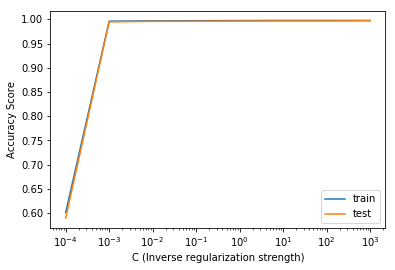

In [11]:
train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for value in C_list:
    
    # Create LogisticRegression object and fit
    logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l1')
    logistic_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(logistic_regression.score(X_train, y_train) )
    test_errors.append(logistic_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

## Scaling your data

In [16]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('logistic_reg', linear_model.LogisticRegression(C = 10, penalty = 'l1'))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

logistic_regression_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

logistic_regression_scaled.score(X_test, y_test)

0.99729539040451554

## Interpreting the results of the model 

In [18]:
#Printing out the coefficients of each variable 

print(logistic_regression.coef_)

[[  4.80188666e-05   1.59768979e-01   2.51418163e-01  -4.70355274e-06
    2.36326041e-05  -3.43658187e-05  -1.55507920e-06  -8.30036365e-08
   -1.13670693e+01  -9.12306047e+00  -1.67613709e+01  -1.17033896e+01
   -9.11703172e+00]]


In [19]:
#Printing out the intercept of the model

print(logistic_regression.intercept_)

[ 2.68799332]
